**Healthcare Dataset Task**
* Use multiple linear regression where age and BMI are our features (x) and cost is our output (y).
* Create a model that can predict the cost of the medical insurance based on age and BMI.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Importing dataset from Kaggle, having downloaded the insurance.csv from the website.

In [ ]:
insurance_dataset = pd.read_csv('insurance.csv')

In [ ]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. Exploratory Data Analysis

In [ ]:
insurance_dataset.shape

(1338, 7)

In [ ]:
insurance_dataset.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


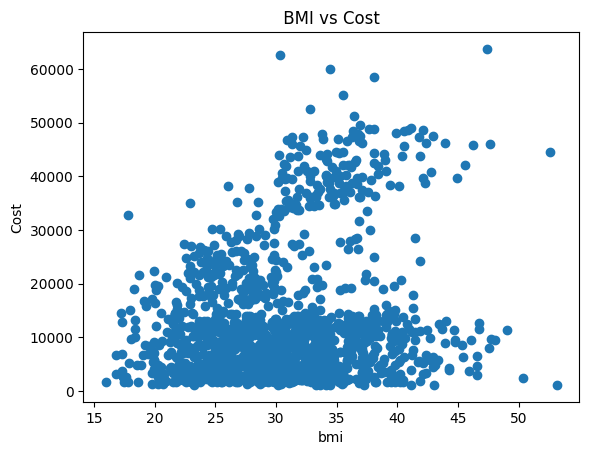

In [ ]:
#: Plot the data for BMI and charges
plt.scatter(insurance_dataset['bmi'], insurance_dataset['charges'])
plt.title(' BMI vs Cost ')
plt.xlabel('bmi')
plt.ylabel('Cost')
plt.show()

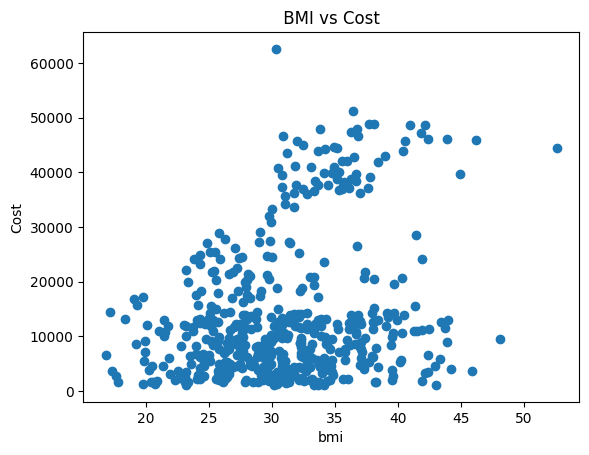

In [ ]:
#: Plot the data for BMI and charges using a sample
insurance_dataset_750= insurance_dataset.sample(n=500, random_state=50)
plt.scatter(insurance_dataset_750['bmi'], insurance_dataset_750['charges'])
plt.title(' BMI vs Cost ')
plt.xlabel('bmi')
plt.ylabel('Cost')
plt.show()

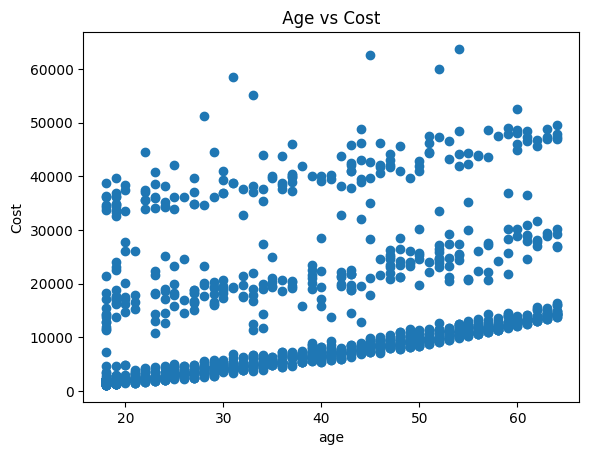

In [ ]:
#: Plot the data for age and charges
plt.scatter(insurance_dataset['age'], insurance_dataset['charges'])
plt.title(' Age vs Cost ')
plt.xlabel('age')
plt.ylabel('Cost')
plt.show()

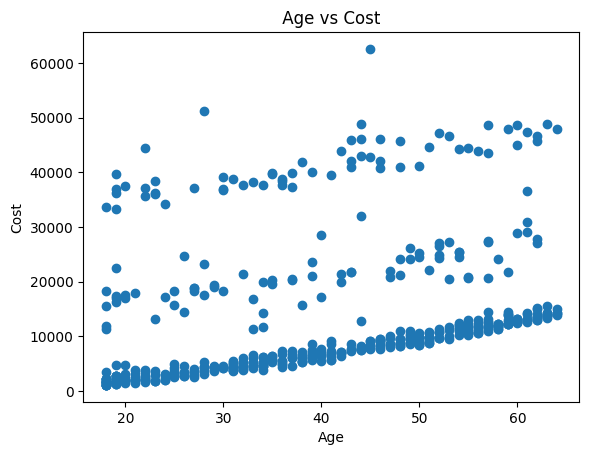

In [ ]:
#: Plot the data for age and charges using a sample
plt.scatter(insurance_dataset_750['age'], insurance_dataset_750['charges'])
plt.title(' Age vs Cost ')
plt.xlabel('Age')
plt.ylabel('Cost')
plt.show()

In [ ]:
#Check if cost is affected by sex
insurance_dataset.groupby('sex', as_index=False)['charges'].median()

,sex,charges
0,female,9412.96250
1,male,9369.61575


In [ ]:
#Check if cost is affected by sex
insurance_dataset.groupby('smoker', as_index=False)['charges'].median()

,smoker,charges
0,no,7345.40530
1,yes,34456.34845


In [ ]:
import plotly.express as px

plot_df = insurance_dataset.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in insurance_dataset['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges',
             opacity=0.75, barmode='group', color_discrete_sequence=['#107d34','#80f7a8'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False),
                  yaxis=dict(title='Claim Amount, $', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

In [ ]:
fig = px.scatter(insurance_dataset, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False),
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

In [ ]:
insurance_dataset_under50 = insurance_dataset[insurance_dataset.age < 51]

Data Scrubbing - Labelling our data/Supervised learning.

In [ ]:
# Z-Score method for outlier removal
def remove_outliers_zscore(df, target_column):
    z_scores = np.abs((df[target_column] - df[target_column].mean()) / df[target_column].std())
    df_no_outliers = df[z_scores < 3]  # Remove points with Z-scores >= 3
    return df_no_outliers

# Apply Z-Score outlier removal to 'charges' column (your target variable)
insurance_dataset = remove_outliers_zscore(insurance_dataset, 'charges')

In [ ]:
#Creating new One-hot encoded columns
dummies = []
cols = ['sex', 'smoker', 'region']

In [ ]:
for col in cols:
	dummies.append(pd.get_dummies(insurance_dataset[col]))

all_dummies = pd.concat(dummies, axis=1)
all_dummies

,female,male,no,yes,northeast,northwest,southeast,southwest
0,True,False,False,True,False,False,False,True
1,False,True,True,False,False,False,True,False
2,False,True,True,False,False,False,True,False
3,False,True,True,False,False,True,False,False
4,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,False,True,True,False,False,True,False,False
1334,True,False,True,False,True,False,False,False
1335,True,False,True,False,False,False,True,False
1336,True,False,True,False,False,False,False,True


In [ ]:
# Add dummies to df and remove the old columns
insurance_dataset = pd.concat((insurance_dataset,all_dummies), axis=1)
insurance_dataset = insurance_dataset.drop(['sex', 'smoker', 'region'], axis=1)

In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1331 non-null   int64  
 1   bmi        1331 non-null   float64
 2   children   1331 non-null   int64  
 3   charges    1331 non-null   float64
 4   female     1331 non-null   bool   
 5   male       1331 non-null   bool   
 6   no         1331 non-null   bool   
 7   yes        1331 non-null   bool   
 8   northeast  1331 non-null   bool   
 9   northwest  1331 non-null   bool   
 10  southeast  1331 non-null   bool   
 11  southwest  1331 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 62.4 KB


In [ ]:
insurance_dataset.head()

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
#separate features from the targets, supervised learning

X = insurance_dataset.loc[:, insurance_dataset.columns != 'charges'].values
y = insurance_dataset['charges'].values

In [ ]:
X[0:5]

array([[19, 27.9, 0, True, False, False, True, False, False, False, True],
       [18, 33.77, 1, False, True, True, False, False, False, True,
        False],
       [28, 33.0, 3, False, True, True, False, False, False, True, False],
       [33, 22.705, 0, False, True, True, False, False, True, False,
        False],
       [32, 28.88, 0, False, True, True, False, False, True, False,
        False]], dtype=object)

In [ ]:
y[0:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

Data Scrubbing - 'Feature Scaling'

Why?
* Age might range from 0 to 100, while BMI might range from 15 to 40. Because these features have different units and ranges, one feature (BMI, in this case) could disproportionately influence the model over the other (age), which could lead to inaccurate predictions.

In [ ]:
# #Scaling the age and fare features
# from sklearn import preprocessing
# X[:, 0] = preprocessing.scale(X[:,0])
# X[:, 1] = preprocessing.scale(X[:, 1])
# X[:, 2] = preprocessing.scale(X[:, 2])

In [ ]:
X[0:5]

array([[19, 27.9, 0, True, False, False, True, False, False, False, True],
       [18, 33.77, 1, False, True, True, False, False, False, True,
        False],
       [28, 33.0, 3, False, True, True, False, False, False, True, False],
       [33, 22.705, 0, False, True, True, False, False, True, False,
        False],
       [32, 28.88, 0, False, True, True, False, False, True, False,
        False]], dtype=object)

Split Validation

In [ ]:
# 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implement Algorithm

In [ ]:
# Training our Model
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=0)
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

In [ ]:

print("score:",model.score(X_test,y_test))

score: 0.8789283563779116


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error
mse = mean_squared_error(y_test, y_prediction)
print('Mean Squared Error:', mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_prediction)
print('Mean Absolute Error:', mae)

Mean Squared Error: 19222072.052046858
Mean Absolute Error: 2376.219211920721


In [ ]:
print("Mean of y_test:", np.mean(y_test))
print("Median of y_test:", np.median(y_test))

Mean of y_test: 14061.668828801498
Median of y_test: 9872.701


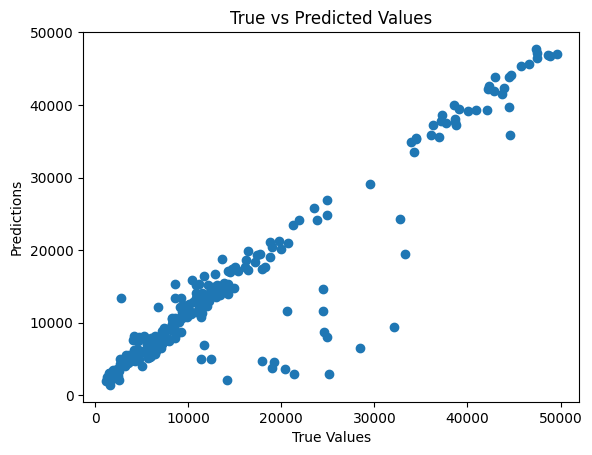

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   charges    1338 non-null   float64
 4   female     1338 non-null   bool   
 5   male       1338 non-null   bool   
 6   no         1338 non-null   bool   
 7   yes        1338 non-null   bool   
 8   northeast  1338 non-null   bool   
 9   northwest  1338 non-null   bool   
 10  southeast  1338 non-null   bool   
 11  southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [ ]:
new_data = pd.DataFrame({
    'age': [19],
    'bmi': [27.900],
    'children': [0],
    'female': [True],
    'male': [False],
    'no': [False],
    'yes': [True],
    'northeast': [False],
    'northwest': [False],
    'southeast': [True],
    'southwest': [False]
})

# Make predictions using the trained best model
predictions = model.predict(new_data)

# Print the predictions
print('Predicted charges for the new data: {:.2f}'.format(predictions[0]))

Predicted charges for the new data: 18185.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but GradientBoostingRegressor was fitted without feature names



Random Forest Mean Squared Error: 21211873.341058195
Mean Absolute Error: 2547.563691049813


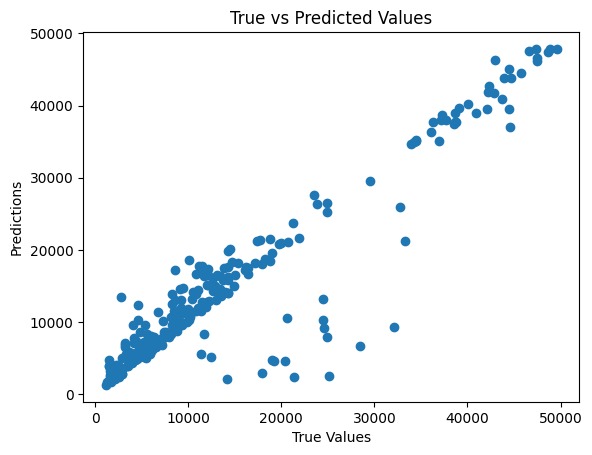

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_prediction_rf = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_prediction_rf)
print('Random Forest Mean Squared Error:', mse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_prediction_rf)
print('Mean Absolute Error:', mae)


plt.scatter(y_test, y_prediction_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()